CSC536: Data Viz. Fundamentals

SIT@KMUTT

2023

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


# An interactive visualizations are graphical representations of analyzed data 
# We'll use Plotly Express and Altair libraries.

# Ref: https://plotly.com/python/
#      https://altair-viz.github.io/
# Also, Interactive data visualization with Python, Abha Belorkar et al., Packt Publishing, 2020

# Use this for personal and educational development purposes only.

An interactive visualizations are graphical representations of analyzed data 
(static or dynamic) that can react and respond to user actions in the moment.

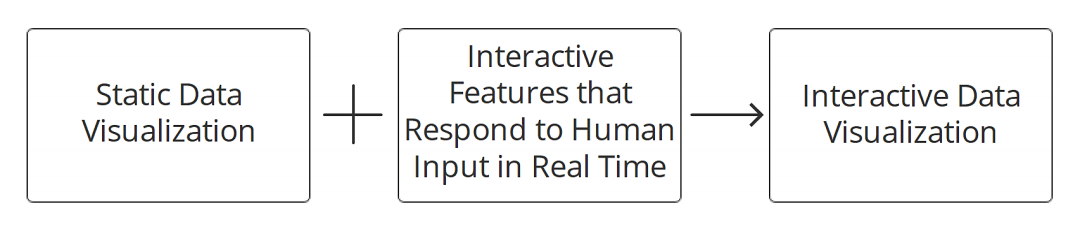

In [2]:
url_co2 = 'https://raw.githubusercontent.com/TrainingByPackt/Interactive-Data-Visualization-with-Python/master/datasets/co2.csv'
co2 = pd.read_csv(url_co2)
url_gm = 'https://raw.githubusercontent.com/TrainingByPackt/Interactive-Data-Visualization-with-Python/master/datasets/gapminder.csv'
gm = pd.read_csv(url_gm)


In [85]:
print(co2.shape)
co2.info()
co2.head()


(192, 216)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Columns: 216 entries, country to 2014
dtypes: float64(215), object(1)
memory usage: 324.1+ KB


,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0529,0.0637,0.0854,0.154,0.242,0.294,0.412,0.35,0.316,0.299
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.3800,1.2800,1.3000,1.460,1.480,1.560,1.790,1.68,1.730,1.960
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.2200,2.9900,3.1900,3.160,3.420,3.300,3.290,3.46,3.510,3.720
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.3000,6.7500,6.5200,6.430,6.120,6.120,5.870,5.92,5.900,5.830
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.9800,1.1000,1.2000,1.180,1.230,1.240,1.250,1.33,1.250,1.290


In [97]:
# Access a given row, and some columns

co2.iloc[0][1:50]

1800    NaN
1801    NaN
1802    NaN
1803    NaN
1804    NaN
1805    NaN
1806    NaN
1807    NaN
1808    NaN
1809    NaN
1810    NaN
1811    NaN
1812    NaN
1813    NaN
1814    NaN
1815    NaN
1816    NaN
1817    NaN
1818    NaN
1819    NaN
1820    NaN
1821    NaN
1822    NaN
1823    NaN
1824    NaN
1825    NaN
1826    NaN
1827    NaN
1828    NaN
1829    NaN
1830    NaN
1831    NaN
1832    NaN
1833    NaN
1834    NaN
1835    NaN
1836    NaN
1837    NaN
1838    NaN
1839    NaN
1840    NaN
1841    NaN
1842    NaN
1843    NaN
1844    NaN
1845    NaN
1846    NaN
1847    NaN
1848    NaN
Name: 0, dtype: object

In [91]:
# Access a given row, and all columns

co2['country'][:]

0      Afghanistan
1          Albania
2          Algeria
3          Andorra
4           Angola
          ...     
187      Venezuela
188        Vietnam
189          Yemen
190         Zambia
191       Zimbabwe
Name: country, Length: 192, dtype: object

In [101]:
# Use the name of the column and then the index or the label of the row
co2['country'][3]

'Andorra'

In [71]:
co2.columns

Index(['country', '1800', '1801', '1802', '1803', '1804', '1805', '1806',
       '1807', '1808',
       ...
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014'],
      dtype='object', length=216)

In [102]:
co2.transpose()

,0,1,2,3,4,5,6,7,8,9,...,182,183,184,185,186,187,188,189,190,191
country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
1800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.16,0.0372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.14,0.0386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.13,0.041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.36,0.0412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010,0.294,1.56,3.3,6.12,1.24,5.54,4.56,1.47,17.7,8.03,...,7.79,17.5,1.89,3.64,0.512,6.51,1.61,0.993,0.194,0.552
2011,0.412,1.79,3.29,5.87,1.25,5.36,4.6,1.71,17.4,7.69,...,7.02,17.0,2.29,3.91,0.546,6.0,1.7,0.811,0.206,0.665
2012,0.35,1.68,3.46,5.92,1.33,5.42,4.57,1.98,17.0,7.31,...,7.29,16.3,2.56,3.92,0.459,6.65,1.57,0.749,0.249,0.53
2013,0.316,1.73,3.51,5.9,1.25,5.36,4.46,1.9,16.1,7.28,...,7.09,16.4,2.23,3.44,0.42,6.07,1.61,0.997,0.261,0.776


In [22]:
gm.info()
gm.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10111 entries, 0 to 10110
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          10111 non-null  object 
 1   Year             10111 non-null  int64  
 2   fertility        10100 non-null  float64
 3   life             10111 non-null  float64
 4   population       10108 non-null  float64
 5   child_mortality  9210 non-null   float64
 6   gdp              9000 non-null   float64
 7   region           10111 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 632.1+ KB


,Country,Year,fertility,life,population,child_mortality,gdp,region
0,Afghanistan,1964,7.671,33.639,10474903.0,339.7,1182.0,South Asia
1,Afghanistan,1965,7.671,34.152,10697983.0,334.1,1182.0,South Asia
2,Afghanistan,1966,7.671,34.662,10927724.0,328.7,1168.0,South Asia
3,Afghanistan,1967,7.671,35.170,11163656.0,323.3,1173.0,South Asia
4,Afghanistan,1968,7.671,35.674,11411022.0,318.1,1187.0,South Asia


In [23]:
df_gm = gm[['Country', 'region']].drop_duplicates()
df_gm

,Country,region
0,Afghanistan,South Asia
50,Albania,Europe & Central Asia
100,Algeria,Middle East & North Africa
150,Angola,Sub-Saharan Africa
200,Antigua and Barbuda,America
...,...,...
9901,Western Sahara,Middle East & North Africa
9951,"Yemen, Rep.",Middle East & North Africa
10001,Zambia,Sub-Saharan Africa
10051,Zimbabwe,Sub-Saharan Africa


In [36]:
# Merging is necessary to ensure that both the co2 DataFrame and the gm DataFrame consist of the same countries, 
# thus guaranteeing that the values of the CO2 emissions will correspond to their respective countries.

# Performs an inner join on the two DataFrames
# Inner join returns only the matching rows between both the tables, non-matching rows are eliminated. 
# On the other hand, full Join or full Outer Join returns all rows from both the tables

df_w_regions = pd.merge(co2, df_gm, left_on ='country', right_on ='Country', how ='inner')
df_w_regions

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,Country,region
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0854,0.154,0.242,0.294,0.412,0.350,0.316,0.299,Afghanistan,South Asia
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.3000,1.460,1.480,1.560,1.790,1.680,1.730,1.960,Albania,Europe & Central Asia
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.1900,3.160,3.420,3.300,3.290,3.460,3.510,3.720,Algeria,Middle East & North Africa
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.2000,1.180,1.230,1.240,1.250,1.330,1.250,1.290,Angola,Sub-Saharan Africa
4,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.1400,5.190,5.450,5.540,5.360,5.420,5.360,5.380,Antigua and Barbuda,America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,Vanuatu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.4500,0.423,0.524,0.512,0.546,0.459,0.420,0.595,Vanuatu,East Asia & Pacific
169,Venezuela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.8100,6.360,6.290,6.510,6.000,6.650,6.070,6.030,Venezuela,America
170,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.2200,1.360,1.470,1.610,1.700,1.570,1.610,1.800,Vietnam,East Asia & Pacific
171,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.1520,0.166,0.186,0.194,0.206,0.249,0.261,0.288,Zambia,Sub-Saharan Africa


In [37]:
# Drop one of the country columns since there are two

df_w_regions = df_w_regions.drop('Country', axis='columns')

df_w_regions

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,region
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0637,0.0854,0.154,0.242,0.294,0.412,0.350,0.316,0.299,South Asia
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.2800,1.3000,1.460,1.480,1.560,1.790,1.680,1.730,1.960,Europe & Central Asia
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.9900,3.1900,3.160,3.420,3.300,3.290,3.460,3.510,3.720,Middle East & North Africa
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.1000,1.2000,1.180,1.230,1.240,1.250,1.330,1.250,1.290,Sub-Saharan Africa
4,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.9100,5.1400,5.190,5.450,5.540,5.360,5.420,5.360,5.380,America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,Vanuatu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.2220,0.4500,0.423,0.524,0.512,0.546,0.459,0.420,0.595,East Asia & Pacific
169,Venezuela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.2200,5.8100,6.360,6.290,6.510,6.000,6.650,6.070,6.030,America
170,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.2100,1.2200,1.360,1.470,1.610,1.700,1.570,1.610,1.800,East Asia & Pacific
171,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.1850,0.1520,0.166,0.186,0.194,0.206,0.249,0.261,0.288,Sub-Saharan Africa


In [54]:

# The melt() function changes the format of a DataFrame into one that has identifier variables of our choice.

new_co2 = pd.melt(df_w_regions, id_vars=['country', 'region'])
new_co2

,country,region,variable,value
0,Afghanistan,South Asia,1800,NaN
1,Albania,Europe & Central Asia,1800,NaN
2,Algeria,Middle East & North Africa,1800,NaN
3,Angola,Sub-Saharan Africa,1800,NaN
4,Antigua and Barbuda,America,1800,NaN
...,...,...,...,...
37190,Vanuatu,East Asia & Pacific,2014,0.595
37191,Venezuela,America,2014,6.030
37192,Vietnam,East Asia & Pacific,2014,1.800
37193,Zambia,Sub-Saharan Africa,2014,0.288


In [109]:
# Next, we want the identifier variables to be country and region since they are the constants
# and rename the other columns as needed.

columns = ['country', 'region', 'year', 'co2']
new_co2.columns = columns



In [104]:
# We need to set 1964 and onward as the range for the year column and int64 as the data type. 
# Then set the lower limit for the year column as 1964 so that the column consists of int64 values for 1964 and onward. 

# Do this within the new_co2 DataFrame we created in the previous step, and store this in a new DataFrame called df_co2. 
# Sort the values of the df_co2 DataFrame by the country column and then do the same for the year column using .sort_values()

df_co2 = new_co2[new_co2['year'].astype('int64') > 1963]
df_co2 = df_co2.sort_values(by=['country', 'year'])
df_co2['year'] = df_co2['year'].astype('int64')
df_co2.head()

,country,region,year,co2
28372,Afghanistan,South Asia,1964,0.0863
28545,Afghanistan,South Asia,1965,0.1010
28718,Afghanistan,South Asia,1966,0.1080
28891,Afghanistan,South Asia,1967,0.1240
29064,Afghanistan,South Asia,1968,0.1160


In [110]:
# Next, let's create a similar table for the GDP per year per country.

df_gdp = gm[['Country', 'Year', 'gdp']]
df_gdp.columns = ['country', 'year', 'gdp']
df_gdp.head()

,country,year,gdp
0,Afghanistan,1964,1182.0
1,Afghanistan,1965,1182.0
2,Afghanistan,1966,1168.0
3,Afghanistan,1967,1173.0
4,Afghanistan,1968,1187.0


In [111]:
# Merge the two DataFrames together by using the .merge() function on the country and year columns. 

# Store this in a new DataFrame called data. 
# Use the dropna() function to drop the NaN values and the head() function to print the first five rows

# LEFT (OUTER) JOIN : Returns all records from the left table, and the matched records from the right table. 
# RIGHT (OUTER) JOIN : Returns all records from the right table, and the matched records from the left table.

data = pd.merge(df_co2, df_gdp, on=['country', 'year'], how='left')
data = data.dropna()
print(data.head())
print()
print(data.tail())

       country      region  year     co2     gdp
0  Afghanistan  South Asia  1964  0.0863  1182.0
1  Afghanistan  South Asia  1965  0.1010  1182.0
2  Afghanistan  South Asia  1966  0.1080  1168.0
3  Afghanistan  South Asia  1967  0.1240  1173.0
4  Afghanistan  South Asia  1968  0.1160  1187.0

       country              region  year    co2     gdp
8817  Zimbabwe  Sub-Saharan Africa  2009  0.406  1352.0
8818  Zimbabwe  Sub-Saharan Africa  2010  0.552  1484.0
8819  Zimbabwe  Sub-Saharan Africa  2011  0.665  1626.0
8820  Zimbabwe  Sub-Saharan Africa  2012  0.530  1750.0
8821  Zimbabwe  Sub-Saharan Africa  2013  0.776  1773.0


In [106]:
# Create a numpy array of the co2 and gdp columns

np_co2 = np.array(data['co2'])
np_gdp = np.array(data['gdp'])

# Use the .corrcoef() function to print the correlation between the carbon dioxide emissions and the GDP

np.corrcoef(np_co2, np_gdp)

array([[1.        , 0.78219731],
       [0.78219731, 1.        ]])

### Interactive Data Visualization with Plotly Express

Plotly is a very popular Python library and is used to create amazing and informative interactive data visualizations

In [114]:
import plotly.express as px

# Plotly Express is a high-level API. Basically, it creates a high-level wrapper around the base Plotly code

In [115]:

data = pd.merge(df_co2, df_gdp, on=['country', 'year'], how='left')
data = data.dropna()
data.head()

,country,region,year,co2,gdp
0,Afghanistan,South Asia,1964,0.0863,1182.0
1,Afghanistan,South Asia,1965,0.1010,1182.0
2,Afghanistan,South Asia,1966,0.1080,1168.0
3,Afghanistan,South Asia,1967,0.1240,1173.0
4,Afghanistan,South Asia,1968,0.1160,1187.0


In [119]:
# Store the minimum and maximum GDP values as xmin and xmax, respectively
# And do similarly for carbon dioxide emission values

xmin, xmax = min(data.gdp), max(data.gdp)
ymin, ymax = min(data.co2), max(data.co2)

print('x -> ', xmin, xmax)
print('y -> ', ymin, ymax)

x ->  142.0 182668.0
y ->  0.0 101.0


In [120]:
fig = px.scatter(data, x="gdp", y="co2", animation_frame="year", 
animation_group="country", color="region", hover_name="country", 
facet_col="region", width=1579, height=400, log_x=True, size_max=45, 
range_x=[xmin,xmax], range_y=[ymin,ymax])

# The x-axis must be logarithmic
# Set the facet_col parameter as the region column (this divides our plot into six columns, one for each region)
# Set the color of the datapoints as the region column

In [121]:

fig.show()

# We can hover over a datapoint to get more information about it.
# There is a slider at the bottom of the plot that allows us to compare the correlation 
# between the carbon dioxide emissions and the income per year between regions and countries per year.


### Interactive Visualization of Data 
across Strata, using Altair library

- We will learn to create interactive visualizations for data stratified with respect to any categorical variable
- Ref: https://altair-viz.github.io/index.html


In [122]:
# We will see how to create interactive visualizations with altair for data 
# stratified with respect to any categorical variable.

hpi_url = "https://raw.githubusercontent.com/TrainingByPackt/Interactive-Data-Visualization-with-Python/master/datasets/hpi_data_countries.tsv"
# Once downloaded, read it into a DataFrame using pandas
hpi_df = pd.read_csv(hpi_url, sep='\t')

hpi_df.head()


,HPI Rank,Country,Region,Life Expectancy (years),Wellbeing (0-10),Inequality of outcomes,Ecological Footprint (gha/capita),Happy Planet Index
0,1,Costa Rica,Americas,79.1,7.3,15%,2.8,44.7
1,2,Mexico,Americas,76.4,7.3,19%,2.9,40.7
2,3,Colombia,Americas,73.7,6.4,24%,1.9,40.7
3,4,Vanuatu,Asia Pacific,71.3,6.5,22%,1.9,40.6
4,5,Vietnam,Asia Pacific,75.5,5.5,19%,1.7,40.3


In [126]:
# We'll add hover and tooltip functionality to a static scatter plot using altair.

import altair as alt

# hover and tooltip in altair

# Use the mark_circle() function to denote datapoints in the scatter plot using filled circles. Use mark_point() of empty ones.
# Use the encode function to specify the features on the x and y axes.
# Add the interactive() function to make the plot interactive for zooming!

# In altair, quantitative features are denoted as Q, and nominal features are denoted as N.

alt.Chart(hpi_df).mark_circle().encode(
 x='Wellbeing (0-10):Q',
 y='Happy Planet Index:Q',
 color='Region:N',
 tooltip=['Country', 'Region', 'Wellbeing (0-10)', 'Happy Planet Index', 'Life Expectancy (years)'],
).properties(width=700,height=500)

# try to move mouse over any data dot

alt.Chart(...)

In [127]:
# Select and Highlight Functionality on a Scatter Plot

selected_area = alt.selection_interval()

alt.Chart(hpi_df).mark_circle().encode(
 x='Wellbeing (0-10):Q',
 y='Happy Planet Index:Q',
 color=alt.condition(selected_area, 'Region:N', alt.
value('lightgray'))
).add_selection(
 selected_area
)

alt.Chart(...)

In [128]:
#  Selection Based on the Values of a Feature

# This plot initially has all its datapoints in color. However, as you select a value 
# for the Region feature from the input dropdown, you'll notice that the corresponding 
# countries are highlighted in color, while all the other countries are grayed out.

input_dropdown = alt.binding_select(options=list(set(hpi_df.Region)))

selected_points = alt.selection_single(fields=['Region'], bind=input_dropdown, name='Select')

color = alt.condition(selected_points,
 alt.Color('Region:N'),
 alt.value('lightgray'))

alt.Chart(hpi_df).mark_circle().encode(
 x='Wellbeing (0-10):Q',
 y='Happy Planet Index:Q',
 color=color,
 tooltip='Region:N'
).add_selection(
 selected_points
)

# Note: 
# We create an input_dropdown variable using the binding_select() function 
# and set the options parameter to the list of regions in our dataset. Use the 
# selection_single() function to select a set of datapoints. Use the color
# variable to store the condition under which datapoints will be selected – the 
# colors assigned to datapoints within and outside of the selection.


alt.Chart(...)

Done!